In [1]:
pip install python-louvain

Note: you may need to restart the kernel to use updated packages.


In [3]:
import random
import networkx as nx
import numpy as np
from community import community_louvain
import matplotlib.pyplot as plt


MultiGraph with 500 nodes and 31559 edges


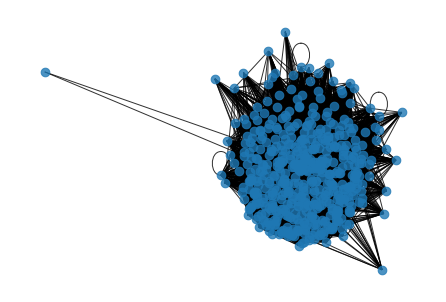

In [4]:
def generate_network(n):
    '''
    This function will generate a random weighted network associated to the user specifed
    number of nodes. 
    
    params:
        n (Integer) : The number of nodes you want in your network
    
    returns:
        A networkX multi-graph
        
    example:
        G = generate_network(n)
    '''
    # initialize dictionary with nodes
    graph_dct = {node:[] for node in range(n)}
    nodes = list(range(n))
    
    # generate edges
    for n,edge_list in graph_dct.items():
        edge_c = random.randint(min(nodes), int(max(nodes) / 2))
        el = random.sample(nodes, edge_c)
        graph_dct[n] = el
    
    # create networkx multi-edge graph
    G = nx.MultiGraph(graph_dct)
    return G

n = 500
G = generate_network(n)
print(nx.info(G))

# visualize graph
pos = nx.spring_layout(G)
nx.draw(G, pos, node_size = 75, alpha = 0.8)
plt.show()

In [5]:
comms = community_louvain.best_partition(G)

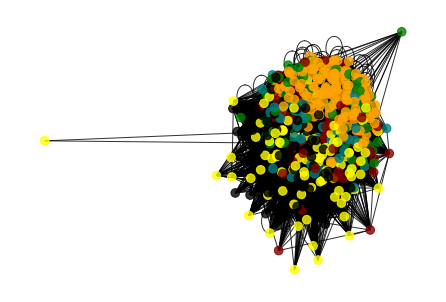

In [6]:
unique_coms = np.unique(list(comms.values()))
cmap = {
    0 : 'maroon',
    1 : 'teal',
    2 : 'black', 
    3 : 'orange',
    4 : 'green',
    5 : 'yellow'
}

node_cmap = [cmap[v] for _,v in comms.items()]

pos = nx.spring_layout(G)
nx.draw(G, pos, node_size = 75, alpha = 0.8, node_color=node_cmap)
plt.show()